In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [107]:
data = pd.read_csv('online_gaming_behavior_insights.csv')
print(data.shape)
print(data.head())

# no na
print(data.isna().sum().sort_values())

(40034, 13)
   PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   
4      9004   33    Male   Europe    Action      15.531945                0   

  GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0         Medium                6                        108           79   
1         Medium                5                        144           11   
2           Easy               16                        142           35   
3           Easy                9                         85           57   
4         Medium                2                        131           95   

   AchievementsUnlocked EngagementLevel  
0       

In [108]:
print(data.dtypes)

PlayerID                       int64
Age                            int64
Gender                        object
Location                      object
GameGenre                     object
PlayTimeHours                float64
InGamePurchases                int64
GameDifficulty                object
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel               object
dtype: object


C:\Users\MMT\AppData\Local\Temp\ipykernel_4496\3160764134.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette=colors)


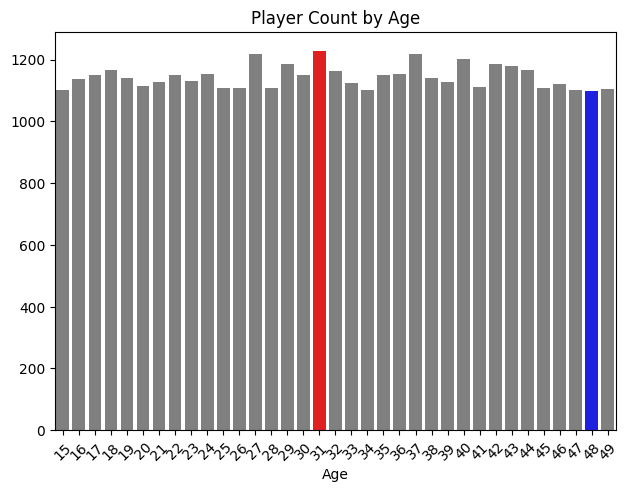

In [109]:
# Univariate Analysis
# print(data['Age'].value_counts())
age_counts = data['Age'].value_counts().sort_index()

max_age = age_counts.idxmax()
min_age = age_counts.idxmin()

colors = [
    'red' if age == max_age else
    'blue' if age == min_age else
    'grey' for age in age_counts.index
]

sns.barplot(x=age_counts.index, y=age_counts.values, palette=colors)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Player Count by Age")
plt.show()

# Ages of the Gamers ranges from 15 to 49
# Most Players are 31 and least are 48
# But there's not a lot of difference in player numbers
# player numbers are high across all ages

GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64


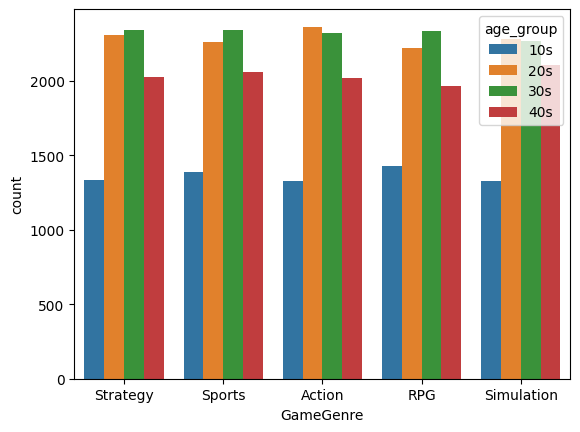

In [110]:
print(data['GameGenre'].value_counts())

data['age_group'] = pd.cut(data['Age'], bins=[10, 20, 30, 40, 50], labels=['10s', '20s', '30s', '40s'])

sns.countplot(data=data, x='GameGenre', hue='age_group')
plt.show()

# Almost equally distributed for all

InGamePurchases
0    31993
1     8041
Name: count, dtype: int64
EngagementLevel
High      10336
Low       10324
Medium    19374
Name: count, dtype: int64


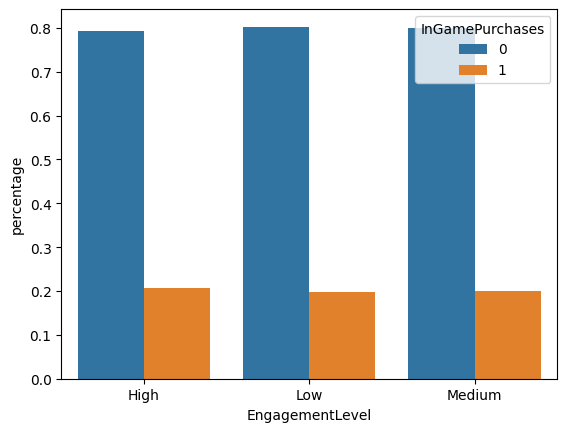

In [111]:
# Target Variable: Engagement Level

print(data['InGamePurchases'].value_counts().sort_index(ascending=True))
print(data['EngagementLevel'].value_counts().sort_index(ascending=True))

counts = (data.groupby(['EngagementLevel', 'InGamePurchases'])
                  .size()
                  .reset_index(name='count')
)

counts['percentage'] = counts.groupby('EngagementLevel')['count'].transform(lambda x: x / x.sum())

sns.barplot(data=counts, x='EngagementLevel', y = 'percentage', hue='InGamePurchases')
plt.show()

# Conducting ANOVA and Chi Square Tests

In [112]:
# Checking whether purchase behaviour is statistically dependent on engagement level or not
# Using Chi-square test

contingency_table_purchase = pd.crosstab(data['EngagementLevel'], data['InGamePurchases'])

result_purchase = chi2_contingency(contingency_table_purchase)

print(result_purchase)

# P-value = 0.225
# Engagement Level alone doesn't significantly influence purchase behaviour

Chi2ContingencyResult(statistic=np.float64(2.9813995085885474), pvalue=np.float64(0.2252150052205898), dof=2, expected_freq=array([[ 8259.97022531,  2076.02977469],
       [ 8250.38047659,  2073.61952341],
       [15482.6492981 ,  3891.3507019 ]]))


In [113]:
# Multivariate Analysis
# See if other variables (playtime, game mode, rewards) interact with engagement to influence purchases

print(data.columns)

# Engagement Level and Gender
contingency_table_gender = pd.crosstab(data['EngagementLevel'], data['Gender'])

result_gender = chi2_contingency(contingency_table_gender)

print(result_gender)

# P values is 0.554 which is more than 0.05.

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel', 'age_group'],
      dtype='object')
Chi2ContingencyResult(statistic=np.float64(1.1808260120611853), pvalue=np.float64(0.5540983914933876), dof=2, expected_freq=array([[ 4150.25228556,  6185.74771444],
       [ 4145.4338812 ,  6178.5661188 ],
       [ 7779.31383324, 11594.68616676]]))


In [114]:
# ANOVA test

groups_age = [
    data.loc[data['EngagementLevel'] == 'Low', 'Age'],
    data.loc[data['EngagementLevel'] == 'Medium', 'Age'],
    data.loc[data['EngagementLevel'] == 'High', 'Age']
]

f_stat_age, p_val_age = f_oneway(*groups_age)
print(f"F_Stat: {f_stat_age} \n P_Value: {p_val_age}")

F_Stat: 1.5074121325579353 
 P_Value: 0.22149497585816014


In [115]:
contingency_table_location = pd.crosstab(data['EngagementLevel'], data['Location'])

result_location = chi2_contingency(contingency_table_location)

print(result_location)

# P value is 0.736

Chi2ContingencyResult(statistic=np.float64(3.5570723296274243), pvalue=np.float64(0.7363616400087856), dof=6, expected_freq=array([[2089.9715242 , 3099.19928061, 1015.94045062, 4130.88874457],
       [2087.54508668, 3095.60113903, 1014.76095319, 4126.0928211 ],
       [3917.48338912, 5809.19958036, 1904.29859619, 7743.01843433]]))


In [116]:
contingency_table_genre = pd.crosstab(data['EngagementLevel'], data['GameGenre'])

result_genre = chi2_contingency(contingency_table_genre)

print(result_genre)

# p value is 0.376

Chi2ContingencyResult(statistic=np.float64(8.611218189112536), pvalue=np.float64(0.3761462722846439), dof=8, expected_freq=array([[2075.5134136 , 2053.05170605, 2061.05530299, 2077.83703852,
        2068.54253884],
       [2073.1037618 , 2050.66813209, 2058.66243693, 2075.42468901,
        2066.14098017],
       [3890.3828246 , 3848.28016186, 3863.28226008, 3894.73827247,
        3877.31648099]]))


In [117]:
contingency_table_playhours = pd.crosstab(data['EngagementLevel'], data['PlayTimeHours'])

result_playhours = chi2_contingency(contingency_table_playhours)

print(result_playhours)

# p value is 0.497

Chi2ContingencyResult(statistic=np.float64(80068.00000000001), pvalue=np.float64(0.49734151847181757), dof=80066, expected_freq=array([[0.25818055, 0.25818055, 0.25818055, ..., 0.25818055, 0.25818055,
        0.25818055],
       [0.2578808 , 0.2578808 , 0.2578808 , ..., 0.2578808 , 0.2578808 ,
        0.2578808 ],
       [0.48393865, 0.48393865, 0.48393865, ..., 0.48393865, 0.48393865,
        0.48393865]], shape=(3, 40034)))


In [118]:
contingency_table_difficulty = pd.crosstab(data['EngagementLevel'], data['GameDifficulty'])

result_difficulty = chi2_contingency(contingency_table_difficulty)

print(result_difficulty)

# p value is 0.383

Chi2ContingencyResult(statistic=np.float64(4.17328935477559), pvalue=np.float64(0.38306138006347035), dof=4, expected_freq=array([[5167.48363891, 2067.50981666, 3101.00654444],
       [5161.4842384 , 2065.10945696, 3097.40630464],
       [9686.0321227 , 3875.38072638, 5812.58715092]]))


In [119]:
# ANOVA test

groups_sessions = [
    data.loc[data['EngagementLevel'] == 'Low', 'SessionsPerWeek'],
    data.loc[data['EngagementLevel'] == 'Medium', 'SessionsPerWeek'],
    data.loc[data['EngagementLevel'] == 'High', 'SessionsPerWeek']
]

f_stat_sessions, p_val_sessions = f_oneway(*groups_sessions)
print(f"F_Stat: {f_stat_sessions} \n P_Value: {p_val_sessions}")

# Players with higher engagement levels play significantly more sessions per week.

F_Stat: 11625.820362943932 
 P_Value: 0.0


In [120]:
# ANOVA test

groups_asdm = [
    data.loc[data['EngagementLevel'] == 'Low', 'AvgSessionDurationMinutes'],
    data.loc[data['EngagementLevel'] == 'Medium', 'AvgSessionDurationMinutes'],
    data.loc[data['EngagementLevel'] == 'High', 'AvgSessionDurationMinutes']
]

f_stat_asdm, p_val_asdm = f_oneway(*groups_asdm)
print(f"F_Stat: {f_stat_asdm} \n P_Value: {p_val_asdm}")

# average session duration differs across engagement levels.

F_Stat: 6207.332075841684 
 P_Value: 0.0


In [121]:
groups_level = [data.loc[data['EngagementLevel']=='Low','PlayerLevel'],
          data.loc[data['EngagementLevel']=='Medium','PlayerLevel'],
          data.loc[data['EngagementLevel']=='High','PlayerLevel']]
f_stat_level, p_val_level = f_oneway(*groups_level)
print(f_stat_level, p_val_level)

# p val is less than 0.05

108.1262051018184 1.4715293899525775e-47


In [122]:
groups_achievements = [data.loc[data['EngagementLevel']=='Low','AchievementsUnlocked'],
          data.loc[data['EngagementLevel']=='Medium','AchievementsUnlocked'],
          data.loc[data['EngagementLevel']=='High','AchievementsUnlocked']]
f_stat_achievements, p_val_achievements = f_oneway(*groups_achievements)
print(f_stat_achievements, p_val_achievements)


# p value is less than 0.05

117.07733777580695 2.0048810813344537e-51


# Test Results
From all the tests done above with **Engagement Level** as the **target** variable, we can conclude the following:

1. PlayerLevel and AchievementsUnlocked have p-values less than 0.05, which shows that Engagement Level and those columns are  likely not independent
2. p-value for SessionsPerWeek and AvgSessionDurationMinutes are so low that it is considered as 0.0. This also shows that the columns are likely not independent.

#### Above, we used ANOVA tests for numeric variables and chi square tests for categorical variables.

# Post-hoc Test
### Using Tukey's HSD

In [129]:
# Running Tukey's HSD for the above 4 variables

tukey_results_player_level = pairwise_tukeyhsd(data['PlayerLevel'], data['EngagementLevel'], alpha=0.05)
print(tukey_results_player_level)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low  -4.7223    0.0 -5.6522 -3.7925   True
  High Medium   0.1026 0.9531 -0.7114  0.9166  False
   Low Medium   4.8249    0.0  4.0106  5.6392   True
----------------------------------------------------


In [ ]:
tukey_results_player_level = pairwise_tukeyhsd(data['AchievementsUnlocked'], data['EngagementLevel'], alpha=0.05)
print(tukey_results_player_level)

# Low-engagement players seem to have more achievements unlocked than both Medium and High engagement players. 
# That’s counterintuitive because we’d expect higher engagement to correlate with more achievements.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  High    Low  -2.4344   0.0 -2.9037 -1.9651   True
  High Medium   0.1204 0.771 -0.2903  0.5312  False
   Low Medium   2.5549   0.0  2.1439  2.9658   True
---------------------------------------------------


In [131]:
tukey_results_player_level = pairwise_tukeyhsd(data['AvgSessionDurationMinutes'], data['EngagementLevel'], alpha=0.05)
print(tukey_results_player_level)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
  High    Low -65.0397   0.0 -66.4362 -63.6432   True
  High Medium -42.0654   0.0 -43.2879  -40.843   True
   Low Medium  22.9743   0.0  21.7514  24.1972   True
-----------------------------------------------------


In [132]:
tukey_results_player_level = pairwise_tukeyhsd(data['SessionsPerWeek'], data['EngagementLevel'], alpha=0.05)
print(tukey_results_player_level)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  High    Low   -9.724   0.0 -9.8735 -9.5745   True
  High Medium  -4.7013   0.0 -4.8322 -4.5704   True
   Low Medium   5.0228   0.0  4.8918  5.1537   True
---------------------------------------------------


## Results from Tukey's HSD 

Players labeled as **High engagement** actually play **fewer** sessions per week and have **shorter** average session durations than both Medium and Low groups. 

In contrast, **Low‑engagement** players log the most sessions and spend the **longest time per session**, with Medium players consistently falling in between.

Gender
Male      23959
Female    16075
Name: count, dtype: int64


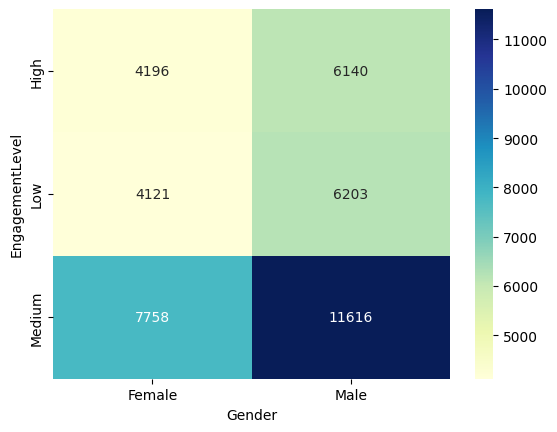

In [139]:
# Each plots
print(data['Gender'].value_counts())
sns.heatmap(contingency_table_gender, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

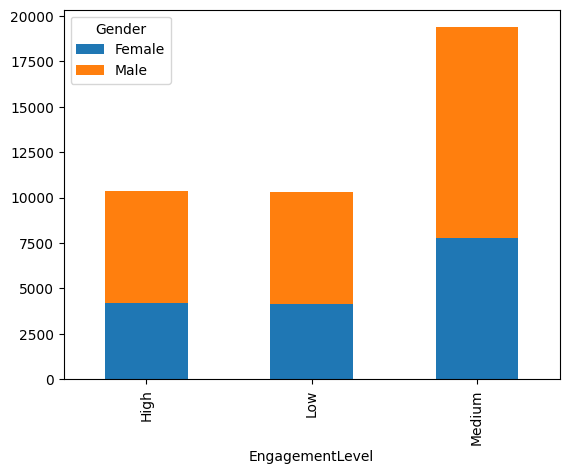

In [138]:
contingency_table_gender.plot(kind='bar',stacked=True)
plt.show()

Regardless of gender, most players fall into the “moderately engaged” category.

In [125]:
# Multi plots

In [126]:
# Clustering
# Group users by behavior patterns and see if purchases emerge in specific clusters

In [127]:
# Segmented Analysis
# Maybe engagement matters only for certain subgroups (e.g., high playtime users)

In [128]:
# Feature Engineering
# Create new variables like “engagement × session length” or “engagement trend over time”